### IMPORTING LIBRARIES

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import random

### LOADING THE DATASET

In [5]:
df = pd.read_csv("sample_dataset.csv")
df

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics
...,...,...,...,...,...,...,...,...,...
49995,891845,Christine,Leach,F,1997-10-21,108.74,2023-08-30,Alexander Ltd,Market
49996,800560,Anna,Allen,F,1999-10-21,133.66,2023-05-03,Knapp-Calhoun,Cosmetic
49997,133285,Nicole,Franklin,M,1979-10-26,464.29,2023-02-12,"Cantrell, Haynes and Ballard",Market
49998,616122,Maria,Keller,M,1981-10-25,472.57,2023-03-25,"Wilson, Jackson and Beard",Market


In [6]:
dataset = df.copy()

### ABOUT THE DATASET

In [8]:
print("no of rows and columns: ",df.shape)

no of rows and columns:  (50000, 9)


In [9]:
print("number of elements: ",df.size)

number of elements:  450000


In [10]:
df.columns


Index(['Customer ID', 'Name', 'Surname', 'Gender', 'Birthdate',
       'Transaction Amount', 'Date', 'Merchant Name', 'Category'],
      dtype='object')

**ABOUT THE FEATURES :**
- Customer ID : The unique identifier for each customer.
- Name : The customer's name.
- Surname : The customer's last name.
- Gender : The gender of the customer.
- Birthdate : The customer's date of birth.
- Transaction Amount : The amount of the transaction. 
- Date : The date of the transaction.
- Merchant Name : The name of the merchant where the transaction was made.
- Category : The category of the transaction.

In [11]:
df.dtypes

Customer ID             int64
Name                   object
Surname                object
Gender                 object
Birthdate              object
Transaction Amount    float64
Date                   object
Merchant Name          object
Category               object
dtype: object

### MISSING VALUES AND DUPLICATES

In [22]:
missing = df.isnull().sum()
missing

Customer ID              0
Name                     0
Surname                  0
Gender                5047
Birthdate                0
Transaction Amount       0
Date                     0
Merchant Name            0
Category                 0
dtype: int64

there is 5047 null values in the Gender

In [13]:
df.duplicated().any()

False

false means there doesn't exist any duplicate values

<Axes: >

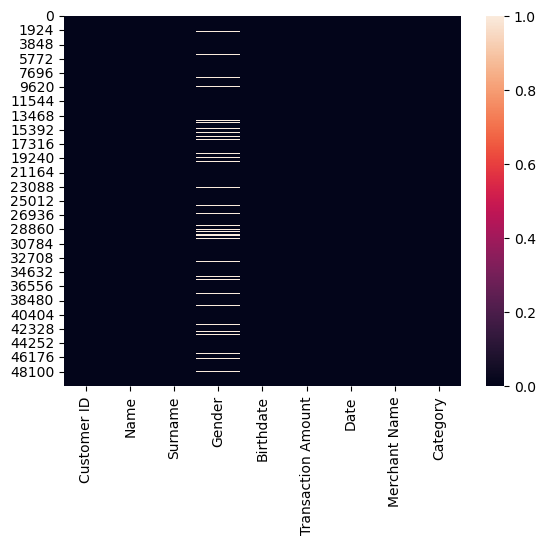

In [15]:
sns.heatmap(df.isnull())

- white line represents null values

### DEALING WITH MISSING VALUES

<Axes: xlabel='Gender', ylabel='count'>

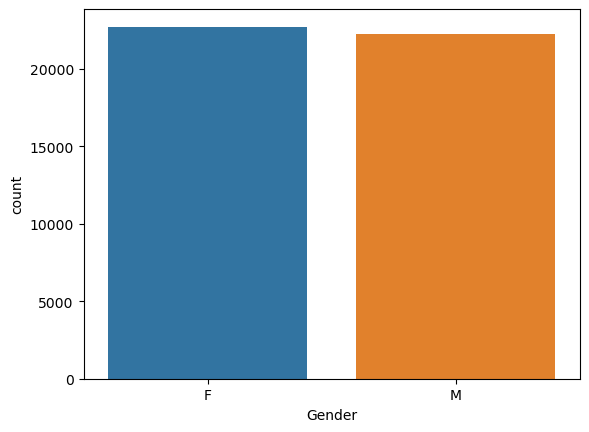

In [16]:
sns.countplot(data=df, x = 'Gender')

Since the Female & Male are equal, we can replace the Nan values with equal amount of Female & Male

In [30]:
m = df.Gender.isna()
df.loc[m, 'Gender'] = random.choices(['F', 'M'], weights = [1,1], k = m.sum())

In [31]:
missing

Customer ID              0
Name                     0
Surname                  0
Gender                5047
Birthdate                0
Transaction Amount       0
Date                     0
Merchant Name            0
Category                 0
dtype: int64

### EXPLORING DATA


- Customer ID is not relevant so we can drop it

In [33]:
df.drop(columns="Customer ID",inplace=True)

In [34]:
df.sample()

,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
880,Cathy,Garcia,F,1953-11-01,41.27,2023-10-03,"Cordova, Simon and Griffin",Restaurant


- Customer ID is removed

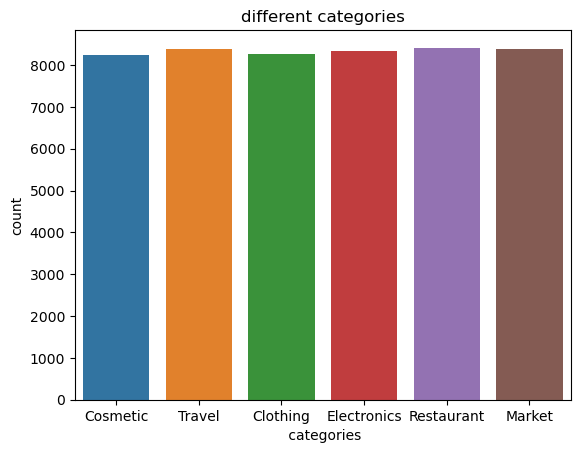

In [35]:
sns.countplot(data=df,x="Category")
plt.title("different categories")
plt.xlabel(" categories")
plt.show()


- all categories performs almost same

###### gender and type of  merchant

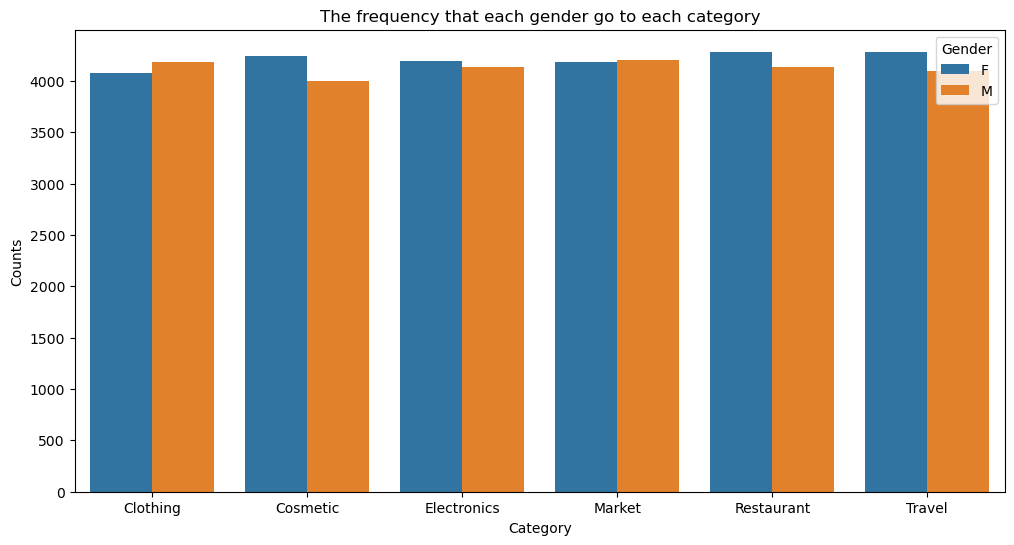

In [38]:
gen_mer = df[['Gender', 'Category', 'Transaction Amount']].groupby(['Category', 'Gender']).count().reset_index()\
            .rename(columns = {'Transaction Amount': 'Counts'})
plt.figure(figsize = (12,6))
sns.barplot(gen_mer, x = 'Category', y = 'Counts', hue = 'Gender')
plt.title('The frequency that each gender go to each category')
plt.show()

- Male & Female go to merchant almost equaly
- Clothing and Market have a little more Male

###### merchant and transactions        

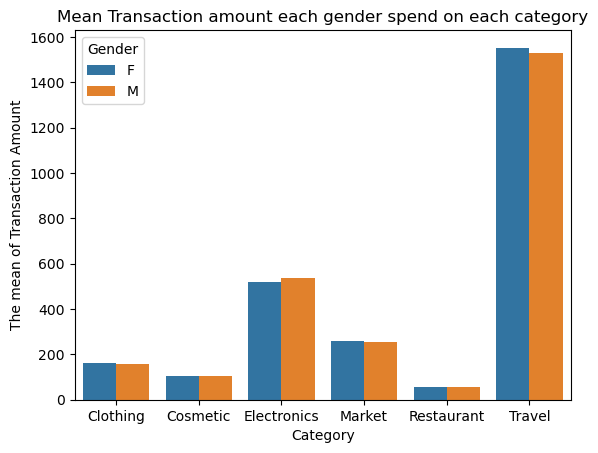

In [39]:
mer_trans = df[['Gender', 'Category', 'Transaction Amount']].groupby(['Category', 'Gender']).mean().reset_index()
sns.barplot(mer_trans, x = 'Category', y = 'Transaction Amount', hue = 'Gender')
plt.title('Mean Transaction amount each gender spend on each category')
plt.ylabel('The mean of Transaction Amount')
plt.show()

- Travel is the highest category customers spent, then is Electronics
- Male and Female spend money almost equal in each category

###### age group and type of merchant 

In [44]:
df["Birthdate"] = pd.to_datetime(df["Birthdate"])

In [45]:
df.dtypes

Name                          object
Surname                       object
Gender                        object
Birthdate             datetime64[ns]
Transaction Amount           float64
Date                          object
Merchant Name                 object
Category                      object
dtype: object

In [46]:
# Calculate the age for each customer based on 'Birthdate'
df['Year'] = df['Birthdate'].dt.year
df['Month'] = df['Birthdate'].dt.month

In [47]:
current_year = pd.to_datetime('now').year
df['Age'] = current_year - df['Birthdate'].dt.year

In [49]:
# Define age ranges
age_bins = [0, 20, 30, 40, 50, 60, 100]  # Customize age ranges as needed
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

In [50]:
# Categorize the customers into age ranges
df['Age Range'] = pd.cut(df['Age'], bins = age_bins, labels = age_labels)


In [55]:
df.sample()

,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Year,Month,Age,Age Range
44270,Jose,Anderson,M,1999-10-21,257.04,2023-07-28,Reynolds-Wilson,Market,1999,10,24,21-30


In [56]:
# Group the data by 'Age Range' and 'Category' and calculate the mean of 'Transaction Amount'
grouped_data = df.groupby(['Age Range', 'Category'])['Transaction Amount'].mean().reset_index()


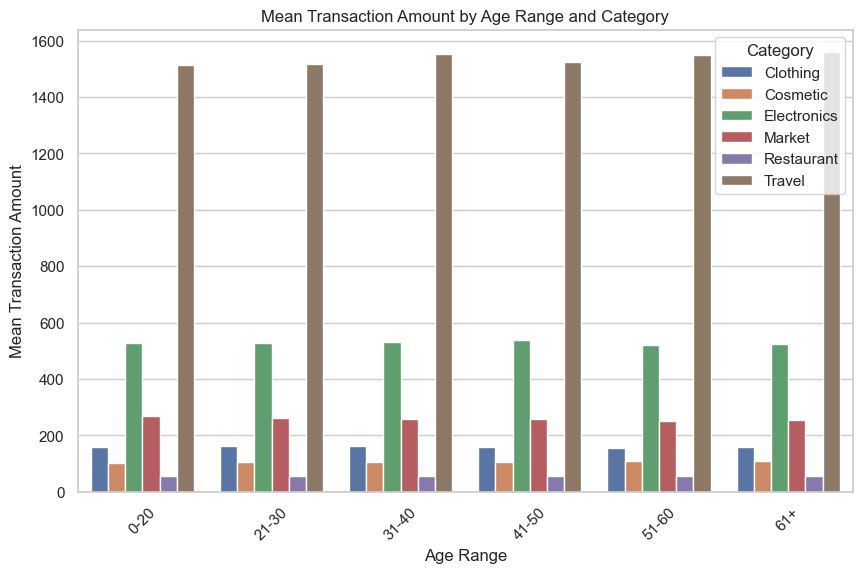

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Range', y='Transaction Amount', hue='Category', data=grouped_data)
plt.title('Mean Transaction Amount by Age Range and Category')
plt.xlabel('Age Range')
plt.ylabel('Mean Transaction Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

- every age people spent on Travel most then Electronics,then Marketing,then Clothing,then Cosmetics,then Restaurant



In [61]:
grouped_data2 = df.groupby(['Age Range', 'Category', 'Gender'])['Transaction Amount'].count().reset_index()

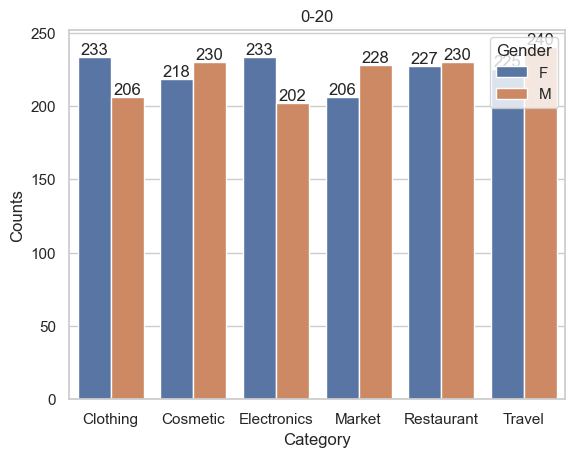

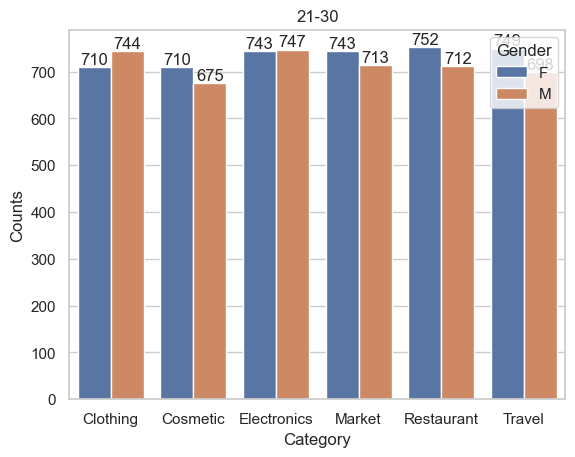

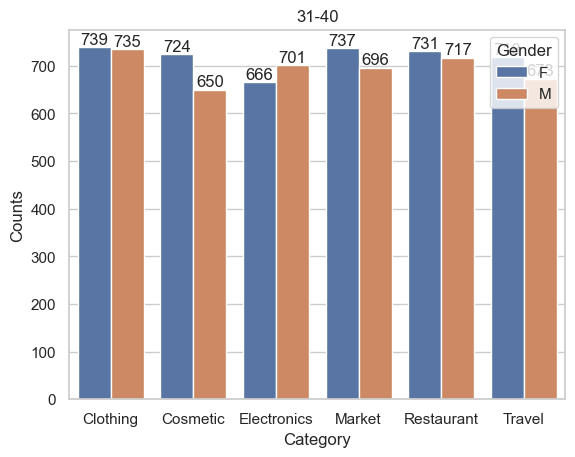

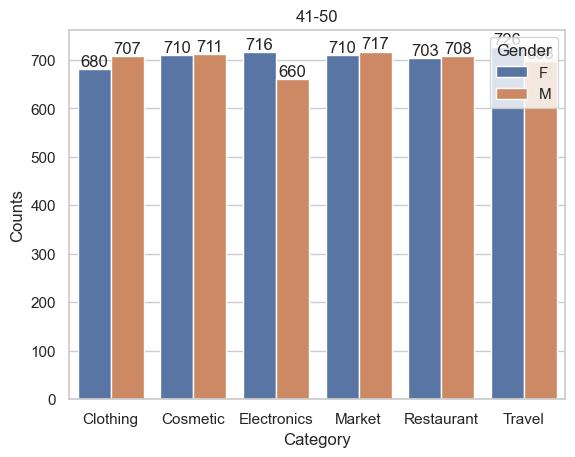

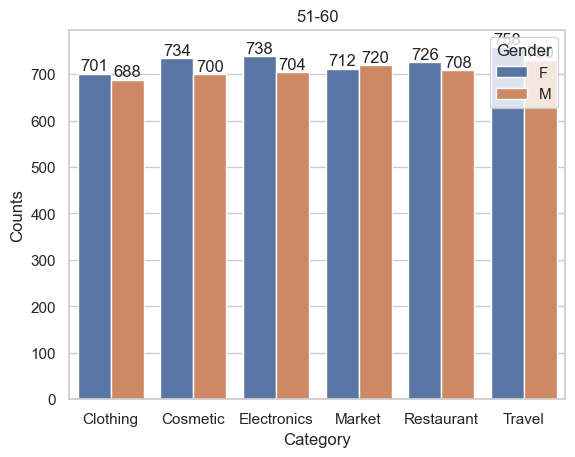

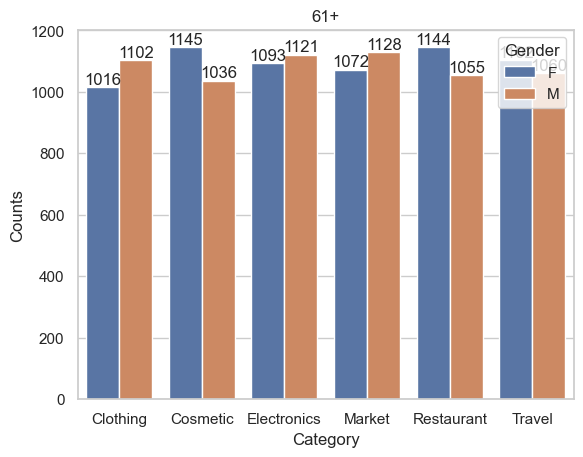

In [70]:

for i in age_labels:
    gd = grouped_data2[grouped_data2['Age Range'] == i]
    plot = sns.barplot(data = gd, x = 'Category', y = 'Transaction Amount', hue = 'Gender')
    plt.title(i)
    plt.xlabel('Category')
    plt.ylabel('Counts') 
    for i in plot.containers:
        plot.bar_label(i,)
    plt.show()

- 0-20 : Female go to Clothing , Electronics more than male and Male go to Market more than Female
- 21-30 : Female go to Travel, Restaurant,Market,Cosmetics more than Male and Male go to Clothing,Electronics more than Female
- 31-40 : Female go to Cosmetic, Travel,Clothing,Market, Restaurant more than Male and Male go to Electronics more than Female
- 41-50 : Female go to Electronics, Travel more than Male and Male go to Restaurant,Market,Cosmetics,Clothing more than Female
- 51-60 : Female go to Travel, Clothing,Electronics,Restaurant,Cosmetics more than Male and Male go to Market more than Female
- 61+   : Female go to Cosmetic,Restaurant,Travel more than Male and Male go to Clothing, Electronics, Market more than Female



###### Is there special Month or Date that people spent more money on some types of merchant 

In [72]:
df["Date"] = pd.to_datetime(df["Date"])

In [76]:
df["Date"].dtype

dtype('<M8[ns]')

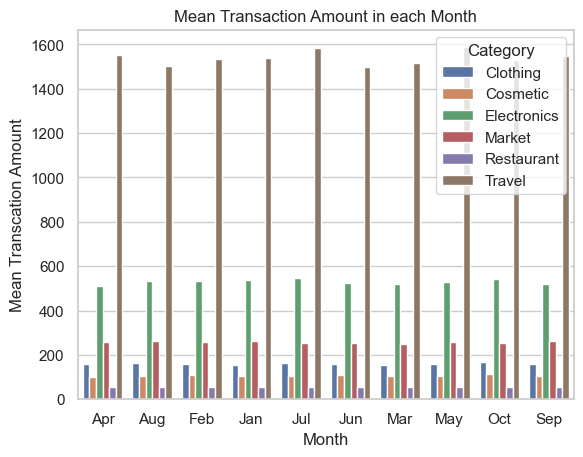

In [77]:
df['Str Month'] = df['Date'].dt.strftime('%b')
# 
mnth_data = df.groupby(['Str Month', 'Category'])['Transaction Amount'].mean().reset_index()
sns.barplot(data = mnth_data, x = 'Str Month', y = 'Transaction Amount', hue = 'Category')
plt.title('Mean Transaction Amount in each Month')
plt.xlabel('Month')
plt.ylabel('Mean Transcation Amount')
plt.show()

- all month shows same trend as more on Travel,then Electronics,then Marketing,then Clothing,then Cosmetics,then Restaurant

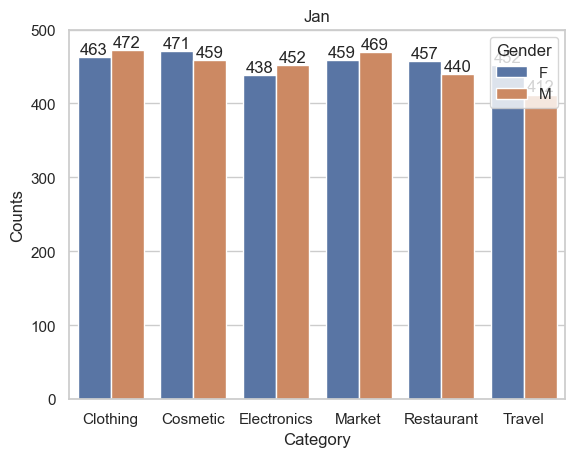

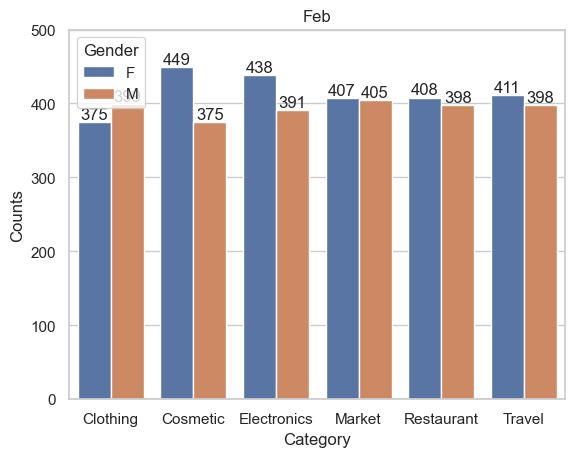

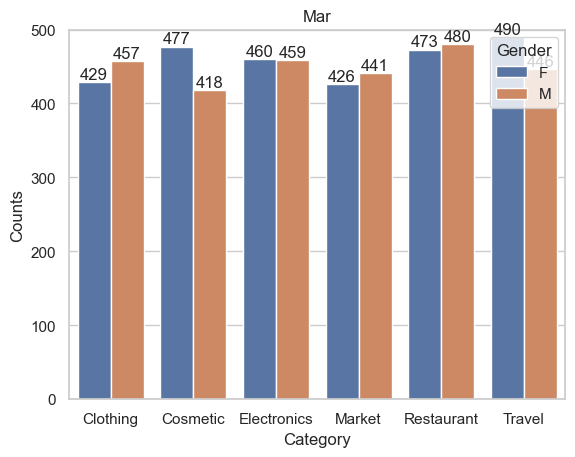

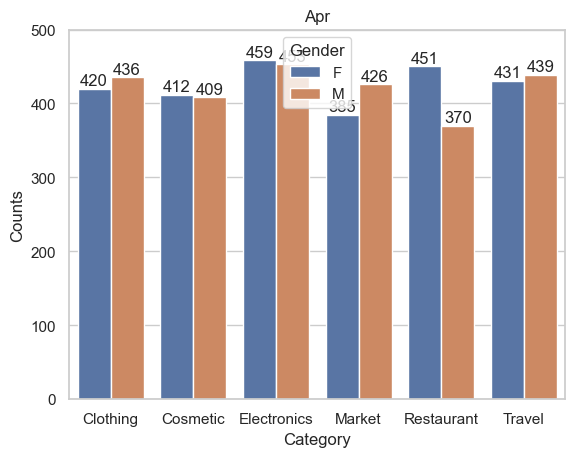

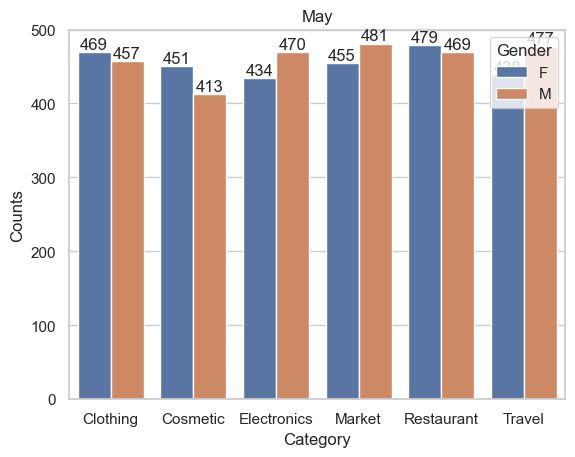

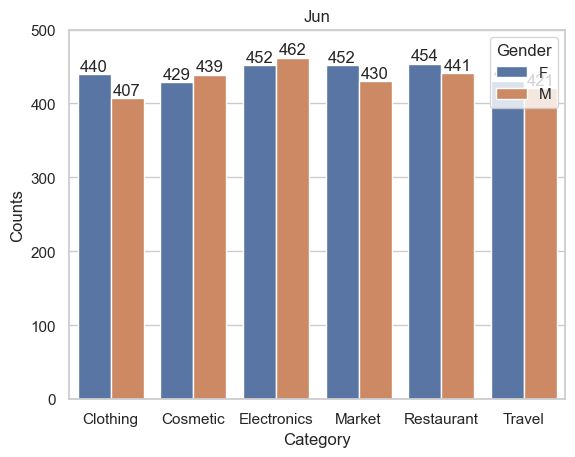

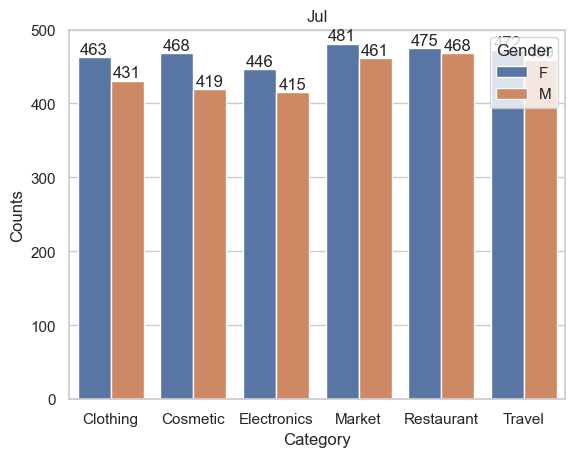

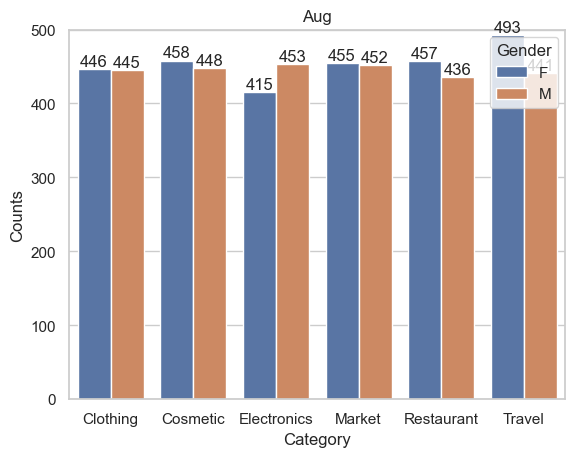

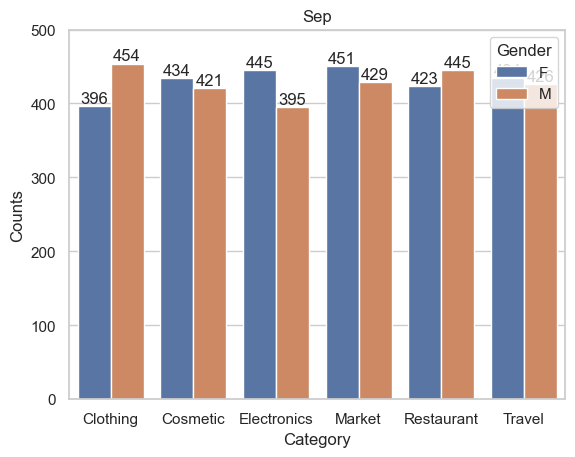

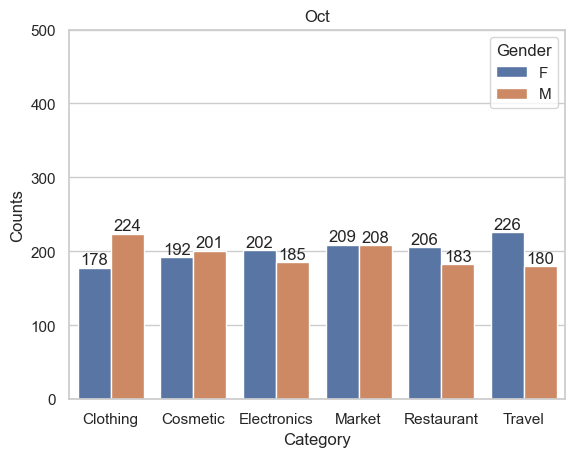

In [78]:
mnth_data_2 = df.groupby(['Str Month', 'Category', 'Gender'])['Transaction Amount'].count().reset_index()
custom_month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Month = sorted(df['Str Month'].unique(), key=lambda x: custom_month_order.index(x))

for i in Month:
    data_mnth = mnth_data_2[mnth_data_2['Str Month'] == i]
    ax = sns.barplot(data = data_mnth, x = 'Category', y = 'Transaction Amount', hue = 'Gender')
    plt.ylim(0, 500) 
    plt.title(i)
    plt.xlabel('Category')
    plt.ylabel('Counts')
    for i in ax.containers:
        ax.bar_label(i,)
    plt.show()

- 'Jan' : Female go to Travel,Restaurant,Cosmetic more than Male and Male go to Clothing,Electronics,Market more than Female
- 'Feb' : Female go to Cosmetic, Electronic,Travel,Restaurant,Market more than Male and Male go to Clothing more than Female
- 'Mar' : Female go to Cosmetic, Travel, Electronic more than Male and Male go Market, Clothing,Restaurantto more than Female
- 'Apr' : Female go to Restaurant,Electronics,Cosmetic more than Male and Male go to Market,Clothing,Travel more than Female
- 'May' : Female go to Cosmetic,Clothing,Restaurant more than Male and Male go to Electronics,Market,Travel more than Female
- 'Jun' : Female go to Clothing,Market,Restaurant,Travel more than Male and Male go to Cosmetic,Electronics more than Female
- 'Jul' : Female go to Cosmetic, Electronics, Market,Clothing,Restaurant,Travel more than Male
- 'Aug' : Female go to Travel,Restaurant,Cosmetic,Clothing,Market more than Male and Male go to Electronics more than Female
- 'Sep' Female go to Electronics,Market,Cosmetic,Travel more than Female and Male go to Clothing,Restaurant more than Female
- 'Oct' Female go to Travel,Restaurant,Electronics,Market more than Male and Male go to Clothing,Cosmetic more than Female
- people buy less in October it may be the resent month details

**CONCLUSIONS :**
- females and males almost equal transactions
- Male & Female go to merchant almost equaly
- Clothing and Market have a little more Male
- Travel is the highest category customers spent, then is Electronics
- Male and Female spend money almost equal in each category
- every age people spent on Travel most then Electronics,then Marketing,then Clothing,then Cosmetics,then Restaurant
- 0-20 : Female go to Clothing , Electronics more than male and Male go to Market more than Female
- 21-30 : Female go to Travel, Restaurant,Market,Cosmetics more than Male and Male go to Clothing,Electronics more than Female
- 31-40 : Female go to Cosmetic, Travel,Clothing,Market, Restaurant more than Male and Male go to Electronics more than Female
- 41-50 : Female go to Electronics, Travel more than Male and Male go to Restaurant,Market,Cosmetics,Clothing more than Female
- 51-60 : Female go to Travel, Clothing,Electronics,Restaurant,Cosmetics more than Male and Male go to Market more than Female
- 61+   : Female go to Cosmetic,Restaurant,Travel more than Male and Male go to Clothing, Electronics, Market more than Female
- all month shows same trend as more on Travel,then Electronics,then Marketing,then Clothing,then Cosmetics,then Restaurant
- 'Jan' : Female go to Travel,Restaurant,Cosmetic more than Male and Male go to Clothing,Electronics,Market more than Female
- 'Feb' : Female go to Cosmetic, Electronic,Travel,Restaurant,Market more than Male and Male go to Clothing more than Female
- 'Mar' : Female go to Cosmetic, Travel, Electronic more than Male and Male go Market, Clothing,Restaurantto more than Female
- 'Apr' : Female go to Restaurant,Electronics,Cosmetic more than Male and Male go to Market,Clothing,Travel more than Female
- 'May' : Female go to Cosmetic,Clothing,Restaurant more than Male and Male go to Electronics,Market,Travel more than Female
- 'Jun' : Female go to Clothing,Market,Restaurant,Travel more than Male and Male go to Cosmetic,Electronics more than Female
- 'Jul' : Female go to Cosmetic, Electronics, Market,Clothing,Restaurant,Travel more than Male
- 'Aug' : Female go to Travel,Restaurant,Cosmetic,Clothing,Market more than Male and Male go to Electronics more than Female
- 'Sep' Female go to Electronics,Market,Cosmetic,Travel more than Female and Male go to Clothing,Restaurant more than Female
- 'Oct' Female go to Travel,Restaurant,Electronics,Market more than Male and Male go to Clothing,Cosmetic more than Female

